In [2]:
import os
import sys
sys.path.insert(0, os.path.relpath('../../../../..')) 



In [3]:

from recidiviz.calculator.modeling.population_projection.simulations.super_simulation_factory import SuperSimulationFactory
from recidiviz.calculator.modeling.population_projection.compartment_transitions import CompartmentTransitions
from recidiviz.calculator.modeling.population_projection.release_transitions import ReleasedTransitions
from recidiviz.calculator.modeling.population_projection.spark_policy import SparkPolicy
import pandas as pd
from functools import partial
import yaml

In [4]:
test_sim = SuperSimulationFactory.build_super_simulation('../state/OK/OK_probation_model_inputs_marginal_cost.yaml')
# commented this out once I'm working on the policy but this should be the first thing you run to make sure the simulation is functional
# test_sim.simulate_baseline(['probation'])

/Users/pacopoler/.local/share/virtualenvs/pulse-data-Jd9N3JcA/lib/python3.7/site-packages/google/cloud/bigquery/table.py:1770: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  create_bqstorage_client=create_bqstorage_client,


outflows_data returned 120 results
transitions_data returned 54 results
total_population_data returned 0 results


In [ ]:
test_sim.data_dict['transitions_data']

In [9]:
test_sim.data_dict['transitions_data']

,Unnamed: 0,compartment,outflow_to,placeholder_axis,compartment_duration,total_population,time_step
0,0,probation,release,x,12.0,0.2155,NaN
1,1,probation,release,x,24.0,0.0800,NaN
2,2,probation,release,x,36.0,0.0902,NaN
3,3,probation,release,x,48.0,0.0624,NaN
4,4,probation,release,x,60.0,0.1069,NaN
5,5,probation,release,x,72.0,0.0300,NaN
6,6,probation,release,x,84.0,0.0378,NaN
7,7,probation,release,x,96.0,0.0272,NaN
8,8,probation,release,x,108.0,0.0200,NaN
9,9,probation,release,x,120.0,0.0708,NaN


,x


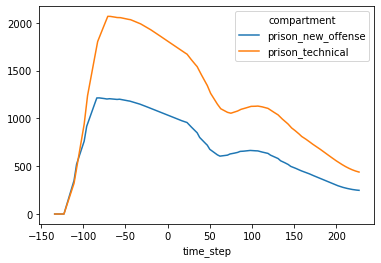

In [10]:
# need to have run baseline for this to work: checking the scale factors are decently close to 1 and population projections look reasonable
test_sim.pop_simulations['baseline'].population_projections.groupby(['time_step', 'compartment']).total_population.sum().unstack()[['prison_new_offense','prison_technical']].plot()
test_sim.pop_simulations['baseline'].gen_scale_factors_df()

In [5]:
test_sim.data_dict['transitions_data']

,Unnamed: 0,compartment,outflow_to,placeholder_axis,compartment_duration,total_population,time_step
0,0,probation,release,x,12.0,0.2155,NaN
1,1,probation,release,x,24.0,0.0800,NaN
2,2,probation,release,x,36.0,0.0902,NaN
3,3,probation,release,x,48.0,0.0624,NaN
4,4,probation,release,x,60.0,0.1069,NaN
5,5,probation,release,x,72.0,0.0300,NaN
6,6,probation,release,x,84.0,0.0378,NaN
7,7,probation,release,x,96.0,0.0272,NaN
8,8,probation,release,x,108.0,0.0200,NaN
9,9,probation,release,x,120.0,0.0708,NaN


In [25]:
# need to have run baseline: looking at the transition tables to get a sense for what I need to change
pd.options.display.max_rows = 250
t = test_sim.pop_simulations['baseline'].sub_simulations['x'].transitions_data
t

,Unnamed: 0,compartment,outflow_to,placeholder_axis,compartment_duration,total_population,time_step
0,0,probation,release,x,12.0,0.2155,NaN
1,1,probation,release,x,24.0,0.0800,NaN
2,2,probation,release,x,36.0,0.0902,NaN
3,3,probation,release,x,48.0,0.0624,NaN
4,4,probation,release,x,60.0,0.1069,NaN
5,5,probation,release,x,72.0,0.0300,NaN
6,6,probation,release,x,84.0,0.0378,NaN
7,7,probation,release,x,96.0,0.0272,NaN
8,8,probation,release,x,108.0,0.0200,NaN
9,9,probation,release,x,120.0,0.0708,NaN


In [6]:
#reminding myself what the sub-groups are, in this case there's just one monolithic group
test_sim.pop_simulations['baseline'].sub_group_ids_dict

{'x': {'placeholder_axis': 'x'}}

initialization time:  60.61972403526306
simulation_time:  10.423229932785034
initialization time:  16.620240926742554
simulation_time:  9.810796976089478


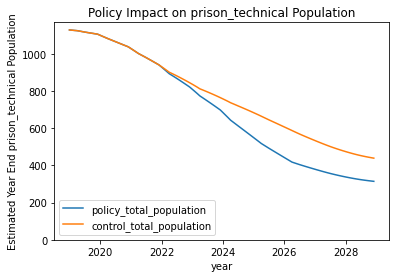

In [5]:
# Policy Option Methods

def apply_earned_credits(retroactive=False):
    return partial(CompartmentTransitions.apply_reduction, 
                   reduction_df=pd.DataFrame({
                       'outflow':['release'],
                       'affected_fraction': [1],
                       'reduction_size': [0.5]
                   }),
                   reduction_type='*',
                   retroactive=retroactive)

def renormalize_technicals_non_retroactive():
    return partial(CompartmentTransitions.preserve_normalized_outflow_behavior, 
                   outflows=['prison_technical'],
                   state='after_non_retroactive')

policy_list_non_retroactive = [
    SparkPolicy(policy_fn=apply_earned_credits(False),
                spark_compartment='probation',
                sub_population={'crime_type': 'x'},
                apply_retroactive=False),
    SparkPolicy(policy_fn=renormalize_technicals_non_retroactive(),
                spark_compartment='probation',
                sub_population={'crime_type': 'x'},
                apply_retroactive=False)
]
    
test_results = test_sim.simulate_policy(policy_list_non_retroactive, 'prison_technical')

In [5]:
#peeking at the transition tables to make sure they're transformed the way I expect them to be
test_sim.pop_simulations['policy'].sub_simulations['x'].simulation_compartments['probation'].transition_tables.transition_dfs

{'before':      prison_new_offense  prison_technical  release  remaining
 1                   0.0               0.0      0.0        1.0
 2                   0.0               0.0      0.0        1.0
 3                   0.0               0.0      0.0        1.0
 4                   0.0               0.0      0.0        1.0
 5                   0.0               0.0      0.0        1.0
 ..                  ...               ...      ...        ...
 224                 0.0               0.0      0.0        1.0
 225                 0.0               0.0      0.0        1.0
 226                 0.0               0.0      0.0        1.0
 227                 0.0               0.0      0.0        1.0
 228                 0.0               0.0      0.0        1.0
 
 [228 rows x 4 columns],
 'transitory':      prison_new_offense  prison_technical   release  remaining
 1                   0.0               0.0  0.000000   1.000000
 2                   0.0               0.0  0.000000   1.000000
 

In [6]:
simulation_tag = 'OK_probation_earned_credit_marginal_costs'
test_sim.upload_simulation_results_to_bq('recidiviz-staging', simulation_tag)

In [7]:
test_sim.output_data['life_years']

,prison_new_offense,release,prison_technical,probation
year,,,,
2019.000000,-0.001668,-0.286838,-0.002861,0.291455
2019.083333,-0.003330,-0.574282,-0.005717,0.583506
2019.166667,-0.004985,-0.862302,-0.008569,0.876123
2019.250000,-0.006636,-1.150866,-0.011418,1.169276
2019.333333,-0.008282,-1.439948,-0.014259,1.462937
...,...,...,...,...
2028.583333,-19.386651,-14198.899323,711.113025,13507.183865
2028.666667,-19.663148,-14484.164342,721.711282,13782.127220
2028.750000,-19.938472,-14771.427949,732.233568,14059.143959


In [6]:
test_sim.output_data['life_years']

,prison_new_offense,release,prison_technical,probation
year,,,,
2019.000000,-0.002094,-0.299183,-0.003625,0.304998
2019.083333,-0.004179,-0.599141,-0.007241,0.610753
2019.166667,-0.006255,-0.899844,-0.010847,0.917236
2019.250000,-0.008325,-1.201261,-0.014444,1.224417
2019.333333,-0.010387,-1.503358,-0.018029,1.532259
...,...,...,...,...
2028.583333,-13.124750,-17007.892523,842.607207,16178.421918
2028.666667,-12.814180,-17358.118949,855.795426,16515.149657
2028.750000,-12.491085,-17710.831560,868.914107,16854.420595


In [8]:
test_sim.pop_simulations['control'].sub_simulations['x'].simulation_compartments['prison_parole_revocations'].transition_tables.transition_dfs

{'before':     parole  remaining
 1      0.0        1.0
 2      0.0        1.0
 3      0.0        1.0
 4      0.0        1.0
 5      0.0        1.0
 6      0.0        1.0
 7      0.0        1.0
 8      0.0        1.0
 9      0.0        1.0
 10     0.0        1.0
 11     0.0        1.0
 12     0.0        1.0
 13     0.0        1.0
 14     0.0        1.0
 15     0.0        1.0
 16     1.0        0.0,
 'transitory':     parole  remaining
 1      0.0        1.0
 2      0.0        1.0
 3      0.0        1.0
 4      0.0        1.0
 5      0.0        1.0
 6      0.0        1.0
 7      0.0        1.0
 8      0.0        1.0
 9      0.0        1.0
 10     0.0        1.0
 11     0.0        1.0
 12     0.0        1.0
 13     0.0        1.0
 14     0.0        1.0
 15     0.0        1.0
 16     1.0        0.0,
 'after_retroactive':     parole  remaining
 1      0.0        1.0
 2      0.0        1.0
 3      0.0        1.0
 4      0.0        1.0
 5      0.0        1.0
 6      0.0        1.0
 7      0.